# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [409]:
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from io import BytesIO

In [294]:
# Import the twitter-archive-enhanced csv file into a DataFrame
df_twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

print(df_twit_arch.shape[0])

df_twit_arch.sample(10)

2356


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1",12,10,Boomer,None,None,pupper,None
1255,710609963652087808,NaN,NaN,2016-03-17 23:33:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",I've watched this a million times and you probably will too. 12/10 (vid by @emily_galasso) https://t.co/DU7Rb3NDiy,NaN,NaN,NaN,https://vine.co/v/idaTpwH5TgU,12,10,None,None,None,None,None
1188,718454725339934721,NaN,NaN,2016-04-08 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This pic is old but I hadn't seen it until today and had to share. Creative af. 13/10 very good boy, would pet well https://t.co/4kD16wMA1Z",NaN,NaN,NaN,https://twitter.com/dog_rates/status/718454725339934721/photo/1,13,10,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Iroh. He's in a predicament. 12/10 someone help him https://t.co/KJAKO2kXsL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/798933969379225600/photo/1,https://twitter.com/dog_rates/status/798933969379225600/photo/1",12,10,Iroh,None,None,None,None
1212,715342466308784130,NaN,NaN,2016-03-31 00:58:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oscar. He's a world renowned snowball inspector. It's a ruff job but someone has to do it. 10/10 great guy https://t.co/vSufMAKm3C,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/715342466308784130/photo/1,https://twitter.com/dog_rates/status/715342466308784130/photo/1",10,10,Oscar,None,None,None,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b",NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1",13,10,Mingus,None,None,None,None
2137,670046952931721218,NaN,NaN,2015-11-27 01:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670046952931721218/photo/1,11,10,Ben,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I…,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/statu

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
* helpful site:
https://www.codegrepper.com/code-examples/python/python+requests+download+file

In [295]:
# Downloading image_predictions.tsv from the given url
'''
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
file_name = url.split('/')[-1].replace('-','_')
with open(file_name,'wb') as file:
    file.write(r.content)
'''    

"\nurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'\nr = requests.get(url)\nfile_name = url.split('/')[-1].replace('-','_')\nwith open(file_name,'wb') as file:\n    file.write(r.content)\n"

In [296]:
image_predic = pd.read_csv('image_predictions.tsv', sep ='\t')
image_predic.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1419,771500966810099713,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,1,Labrador_retriever,0.833952,True,golden_retriever,0.103223,True,soccer_ball,0.012094,False
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True
1484,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,Chesapeake_Bay_retriever,0.003523,True,Labrador_retriever,0.000921,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
151,668643542311546881,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,1,common_iguana,0.483972,False,frilled_lizard,0.111377,False,sandbar,0.078983,False
1194,740359016048689152,https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg,1,golden_retriever,0.863687,True,kuvasz,0.048590,True,Labrador_retriever,0.047397,True
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
563,678021115718029313,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,1,miniature_pinscher,0.822048,True,Doberman,0.096085,True,Rottweiler,0.032709,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
* note: the code used to create API from Udacity

In [297]:
# Create an API object to collect Twitter data.
'''
consumer_key = '4xhMcFp7vpU5HnesW3Vxst8eA'
consumer_secret = '6pKSOdbXJ41mi2UdGwLbH11p4YFIbkZmENlCh7E5j3UAARdmWB'
access_token = '1247786172228587525-6c3dxSHjMNgh8fGPOaoyAlZcw5sOIB'
access_secret = 'ztnUTfvNHnCbl5f1Ro0qd9c1ZcB10rdFKYJriFu3cq1uF'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# calling the api opject
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

'''

"\nconsumer_key = '4xhMcFp7vpU5HnesW3Vxst8eA'\nconsumer_secret = '6pKSOdbXJ41mi2UdGwLbH11p4YFIbkZmENlCh7E5j3UAARdmWB'\naccess_token = '1247786172228587525-6c3dxSHjMNgh8fGPOaoyAlZcw5sOIB'\naccess_secret = 'ztnUTfvNHnCbl5f1Ro0qd9c1ZcB10rdFKYJriFu3cq1uF'\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\n# calling the api opject\napi = tweepy.API(auth)\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n"

Helpful sites:
1. Udacity notes
2. https://www.geeksforgeeks.org/python-api-get_status-in-tweepy/
3. https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

In [298]:
# Extract tweet ids column from the Dataframe and convert it  into a list using Series.to_list()
'''
tweet_ids = df_twit_arch.tweet_id.to_list()
attributes_jason = []
error_id = []

start = time.time()

for id in tweet_ids:
    try:
        status = api.get_status(id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        attributes_jason.append({'tweet_id':id,'favorite_count':status.favorite_count,'retweet_count':status.retweet_count,
                        'created_at':str(status.created_at), 'truncated':status.truncated, 'Text':status.full_text})
    except Exception as e:
        #print(id)
        error_id.append(id)

end = time.time()

# Time in seconds
print('Rate limits is {} seconds'.format(end - start))

'''

"\ntweet_ids = df_twit_arch.tweet_id.to_list()\nattributes_jason = []\nerror_id = []\n\nstart = time.time()\n\nfor id in tweet_ids:\n    try:\n        status = api.get_status(id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n        attributes_jason.append({'tweet_id':id,'favorite_count':status.favorite_count,'retweet_count':status.retweet_count,\n                        'created_at':str(status.created_at), 'truncated':status.truncated, 'Text':status.full_text})\n    except Exception as e:\n        #print(id)\n        error_id.append(id)\n\nend = time.time()\n\n# Time in seconds\nprint('Rate limits is {} seconds'.format(end - start))\n\n"

In [299]:
#print(len(attributes_jason), len(error_id))

In [300]:
# write JSON data to a tweet_json.txt file
'''
with open('tweet_json.txt', 'w') as file:
    for attb in attributes_jason:
        json.dump(attb, file)
        file.write('\n')

'''

"\nwith open('tweet_json.txt', 'w') as file:\n    for attb in attributes_jason:\n        json.dump(attb, file)\n        file.write('\n')\n\n"

In [301]:
# Reading tweet_json.txt file into a pandas DataFrame
data_list = []
with open ('tweet_json.txt', 'r') as json_file:
    for js in json_file:
        data_list.append(json.loads(js))

tweet_attributes = pd.DataFrame(data_list)

In [302]:
tweet_attributes.head()

,tweet_id,favorite_count,retweet_count,created_at,truncated,Text
0,892420643555336193,34526,7188,2017-08-01 16:23:56,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,29939,5394,2017-08-01 00:17:27,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,22526,3560,2017-07-31 00:18:03,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,37768,7412,2017-07-30 15:58:51,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,36059,7945,2017-07-29 16:00:24,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [303]:
df_twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [304]:
df_twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [305]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [306]:
image_predic.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [307]:
tweet_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   int64 
 1   favorite_count  2328 non-null   int64 
 2   retweet_count   2328 non-null   int64 
 3   created_at      2328 non-null   object
 4   truncated       2328 non-null   bool  
 5   Text            2328 non-null   object
dtypes: bool(1), int64(3), object(2)
memory usage: 93.3+ KB


In [308]:
tweet_attributes.describe()

,tweet_id,favorite_count,retweet_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.418403e+17,7208.804983,2535.621993
std,6.823143e+16,11198.630321,4293.243094
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1250.500000,512.000000
50%,7.180382e+17,3121.000000,1180.000000
75%,7.986673e+17,8801.500000,2933.000000
max,8.924206e+17,148073.000000,72690.000000


In [309]:
df_twit_arch.tweet_id.duplicated().any()
df_twit_arch[df_twit_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [310]:
df_twit_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [311]:
df_twit_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [312]:
pd.set_option('display.max_colwidth', None)
print(df_twit_arch[df_twit_arch['rating_numerator']== 1776]['text'])

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object


In [313]:
# Number of dogs name that start with small litter

print(df_twit_arch[df_twit_arch['name'] == df_twit_arch['name'].str.lower()].shape[0])

df_twit_arch[df_twit_arch['name'] == df_twit_arch['name'].str.lower()].head(5)

#df.columns.str.lower()

109


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None


In [314]:
df_twit_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [315]:
df_twit_arch.retweeted_status_id.isnull().sum()

2175

In [316]:
image_predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [317]:
image_predic[image_predic['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [318]:
print(image_predic.jpg_url.duplicated().any())
image_predic[image_predic['jpg_url'].duplicated()]

True


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [319]:
image_predic.jpg_url.value_counts()

https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg                                            1
https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg                                            1
https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg                                            1
https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg                                            1
https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg                       

In [320]:
print(tweet_attributes.shape[0])
tweet_attributes.head()

2328


,tweet_id,favorite_count,retweet_count,created_at,truncated,Text
0,892420643555336193,34526,7188,2017-08-01 16:23:56,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,29939,5394,2017-08-01 00:17:27,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,22526,3560,2017-07-31 00:18:03,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,37768,7412,2017-07-30 15:58:51,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,36059,7945,2017-07-29 16:00:24,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [321]:
tweet_attributes[tweet_attributes.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count,created_at,truncated,Text


### Quality issues
#### df_twit_arch table

- Missing values.

- Erroneous datatypes (tweet_id, timestamp, retweeted_status_timestamp).

- Inaccurate denominators- some of them don't equal 10 in (rating_denominator).

- All names that start with lowercase letters (such as: very, a, an, his, mad, just, ...) are incorrect, and most of them are "None" value.

- Using NaN for missing values in the columns (object type) instead of None. Despite they are different data types in Python, Pandas treat them similarly. So there is no need to change NaN to None.

- Selecting the rows with only original ratings (no retweets) and have images. 

#### image_predic table

- Missing records (2075 of 2356 ).<br />
- Duplicated image url (jpg_url).<br />
- Delete rows that have no (jpg_url).<br />
- Non-descriptive column names (p1, p2, p3)

#### tweet_attributes table

- Erroneous datatypes (created_at).<br />
- Missing records (2328 of 2356).

### Tidiness issues
- Four variables in one column in df_twit_arch table(doggo, floofer, pupper, puppo).

- Tweet_attributes and image_predic should be part of df_twit_arch.

- Created_at in tweet_attributes table should be split into date and time. On the other hand, this column will be dropped because it will not be used for analysis.

- Drop unwanted columns such as (created_at, truncated,Text, ... ,and the retweet attributes).
- Calculte the dog rating in new column by dividing the rating_numerator by rating_denominator.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [322]:
# Make copies of original pieces of data

archive_clean = df_twit_arch.copy()
image_predictions_clean = image_predic.copy()
tweet_attributes_clean = tweet_attributes.copy()

### Missing Data

#### image_predic: Missing records (2075 of 2356 ).           - tweet_attributes: Missing records (2328 of 2356).

#### Define
Merge the tweet_attributes and image_predic tables to the df_twit_arch table, joining on tweet_id.</p>
Helpful site: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

#### Code

In [323]:
archive_clean = pd.merge(archive_clean, image_predictions_clean, on = 'tweet_id', how = 'left')
archive_clean = pd.merge(archive_clean, tweet_attributes_clean, on = 'tweet_id', how = 'left')

#### Test

In [324]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,truncated,Text
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901745569793/photo/1,...,0.160329,True,Irish_terrier,0.069126,True,126823.0,41027.0,2017-01-21 18:26:02,False,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mookie. He really enjoys shopping but not from such high altitudes. Doin him quite the concern. 12/10 someone lower him https://t.co/beWUzGVKRM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968035819520/photo/1,...,0.414002,False,toy_poodle,0.005887,True,12235.0,2167.0,2017-03-01 17:22:13,False,This is Mookie. He really enjoys shopping but not from such high altitudes. Doin him quite the concern. 12/10 someone lower him https://t.co/beWUzGVKRM
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Shadow. She's tired of the responsibilities associated with being a dog. No longer strives to attain ball. 9/10 https://t.co/cdOkfEpjFw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897839910912/video/1,...,0.132928,True,cougar,0.113866,False,2426.0,1021.0,2016-03-07 00:57:27,False,Meet Shadow. She's tired of the responsibilities associated with being a dog. No longer strives to attain ball. 9/10 https://t.co/cdOkfEpjFw
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978131935233/photo/1,...,0.298939,True,borzoi,0.022616,True,2061.0,703.0,2016-01-20 15:44:48,False,Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cleopatricia. She is a northern Paperback Maple. Set up hammock somehow. 9/10 would chill in hammock with https://t.co/sJeHdGUt0W,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449697558528/photo/1,...,0.279479,True,Eskimo_dog,0.198428,True,781.0,347.0,2015-11-21 03:08:47,False,This is Cleopatricia. She is a northern Paperback Maple. Set up hammock somehow. 9/10 would chill in hammock with https://t.co/sJeHdGUt0W


In [325]:
archive_clean.tweet_id.duplicated().sum()

0

#### Define
Select only the tweets that have only the original ratings by the following steps:
- Extract the rows that have no retweets. 
- Drop the rows that have no images.

#### Code

In [326]:
# Remove the retweet
print(archive_clean.retweeted_status_id.notnull().sum())
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

# Remove the tweets that have no images
print(archive_clean.jpg_url.isnull().sum())
archive_clean.dropna(subset=['jpg_url'], inplace=True)     

181
181


#### Test

In [327]:
print(archive_clean.retweeted_status_id.notnull().sum())

0


In [328]:
print(archive_clean['jpg_url'].isnull().sum())

0


### Issue #1: Tidiness

#### Define

Drop the columns in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,	retweeted_status_timestamp, created_at, truncated,Text, source.

#### Code

In [329]:
# Remove multi columns mentioned above
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
                    'retweeted_status_timestamp','created_at','truncated','Text', 'source'], axis = 1, inplace= True)

#### Test

In [330]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   text                1994 non-null   object 
 3   expanded_urls       1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1994 non-null   object 
 7   doggo               1994 non-null   object 
 8   floofer             1994 non-null   object 
 9   pupper              1994 non-null   object 
 10  puppo               1994 non-null   object 
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
 16  p2    

#### Define
Merge four columns (doggo, floofer, pupper, puppo) in one column (dog_stage).

In [331]:
archive_clean.doggo.value_counts() , ' ' , archive_clean.floofer.value_counts(), ' ' , archive_clean.pupper.value_counts(), ' ' , archive_clean.puppo.value_counts()

(None     1920
 doggo      74
 Name: doggo, dtype: int64,
 ' ',
 None       1986
 floofer       8
 Name: floofer, dtype: int64,
 ' ',
 None      1782
 pupper     212
 Name: pupper, dtype: int64,
 ' ',
 None     1971
 puppo      23
 Name: puppo, dtype: int64)

In [332]:
index_stage = archive_clean.columns[archive_clean.columns.get_loc('doggo'): archive_clean.columns.get_loc('puppo')+1] 

for ind in index_stage:
    archive_clean.loc[archive_clean[ind]!= 'None', 'dog_stage'] = archive_clean[ind]

#### Test

In [333]:
archive_clean[['doggo','floofer','pupper','puppo','dog_stage']].sample(10)

,doggo,floofer,pupper,puppo,dog_stage
718,None,None,None,None,NaN
2073,None,None,None,None,NaN
169,None,None,None,None,NaN
1853,None,None,None,None,NaN
389,doggo,None,None,None,doggo
2253,None,None,None,None,NaN
2173,None,None,None,None,NaN
347,None,None,None,None,NaN
2152,None,None,None,None,NaN
1908,None,None,None,None,NaN


In [334]:
archive_clean.dog_stage.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_stage, dtype: int64

In [335]:
#Remove the columns doggo, floofer, pupper, puppo
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace= True)

In [336]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   text                1994 non-null   object 
 3   expanded_urls       1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1994 non-null   object 
 7   jpg_url             1994 non-null   object 
 8   img_num             1994 non-null   float64
 9   p1                  1994 non-null   object 
 10  p1_conf             1994 non-null   float64
 11  p1_dog              1994 non-null   object 
 12  p2                  1994 non-null   object 
 13  p2_conf             1994 non-null   float64
 14  p2_dog              1994 non-null   object 
 15  p3                  1994 non-null   object 
 16  p3_con

#### Define

Change the rating_denominator value to 10.

#### Code

In [337]:
archive_clean.loc[:, 'rating_denominator'] = 10

#### Test

In [338]:
archive_clean.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

#### Define
Calculte the dog rating in new column by dividing the rating_numerator by rating_denominator.

#### Code

In [339]:
archive_clean['rating'] = archive_clean['rating_numerator']/archive_clean['rating_denominator']

#### Test

In [340]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   text                1994 non-null   object 
 3   expanded_urls       1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1994 non-null   object 
 7   jpg_url             1994 non-null   object 
 8   img_num             1994 non-null   float64
 9   p1                  1994 non-null   object 
 10  p1_conf             1994 non-null   float64
 11  p1_dog              1994 non-null   object 
 12  p2                  1994 non-null   object 
 13  p2_conf             1994 non-null   float64
 14  p2_dog              1994 non-null   object 
 15  p3                  1994 non-null   object 
 16  p3_con

### Issue #2: Quality

#### Define
Remove the duplicated image url (jpg_url).

#### Code

After merging the three pieces of data and fixing some problems there is no longer duplicating image url.

#### Test

In [341]:
print(archive_clean['jpg_url'].duplicated().sum())
print(archive_clean.jpg_url.duplicated().any())
archive_clean[archive_clean['jpg_url'].duplicated()]

0
False


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating


#### Define
Convert the datatypes of tweet_id from integer to string.<br />
Convert the datatypes of timestamp from string to datetime.

helpful site: https://www.marsja.se/pandas-convert-column-to-datetime/

#### Code

In [342]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [343]:
print(archive_clean['tweet_id'].dtype, archive_clean['timestamp'].dtype)

object datetime64[ns, UTC]


#### Define

Extract the correct dog's name that start with lowercase if it inside the text, otherwise assign the None to the dog's name.

#### Code

In [344]:
archive_clean.loc[archive_clean['name'] == archive_clean['name'].str.lower(), 'dog_name'] = archive_clean['text'].apply(lambda x: x.split('named')[1] 
                                                                                                                        if 'named' in x else 'None')
archive_clean.loc[archive_clean['name'] != archive_clean['name'].str.lower(), 'dog_name'] = archive_clean['name']

archive_clean.drop('name', axis= 1, inplace= True)

#### Test

In [345]:
print(archive_clean[archive_clean['dog_name'] == archive_clean['dog_name'].str.lower()].shape[0])


0


#### Define
Change the abbreviated column names to descriptive, understandable names (p1, p2, p3).<br/>
p1 is the algorithm's #1 prediction.<br/>
p2 is the algorithm's second most likely prediction.<br/>
p3  the algorithm's third most likely prediction.<br />
helpful site: https://datascienceparichay.com/article/pandas-rename-column-names/

#### Code

In [346]:
old_column_list = list(archive_clean)
old_column_list

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'rating',
 'dog_name']

In [354]:
new_column_list = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator','jpg_url', 
                   'img_num', 'prediction_1', 'p1_conf', 'p1_dog', 'prediction_2', 'p2_conf', 'p2_dog', 'prediction_3', 
                   'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count', 'dog_stage', 'rating', 'dog_name']

archive_clean.set_axis(new_column_list, axis=1, inplace= True)

#### Test

In [355]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   jpg_url             1994 non-null   object             
 7   img_num             1994 non-null   float64            
 8   prediction_1        1994 non-null   object             
 9   p1_conf             1994 non-null   float64            
 10  p1_dog              1994 non-null   object             
 11  prediction_2        1994 non-null   object             
 12  p2_conf             1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file that named "twitter_archive_master.csv".

In [356]:
archive_clean.to_csv('twitter_archive_master.csv', index= False)

In [357]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,prediction_1,p1_conf,...,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating,dog_name
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,...,0.085851,False,banana,0.076110,False,34526.0,7188.0,NaN,1.3,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,0.090647,True,papillon,0.068957,True,29939.0,5394.0,NaN,1.3,Tilly


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What are the most popular dog stages that participated in the tweet by their owners.
2. What are the most popular dog breeds that people like to own?
3. Explain and investigate the relationship between the retweet count and favorite count.
4. Which breed has the highest and lowest rating?

### Visualization

Helpful sites:
- https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
- https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column/48590361

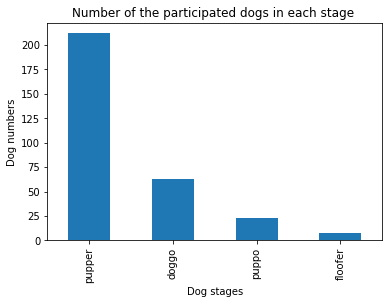

In [365]:
# Plotting the most popular dog stages that participated in the tweet by its owners.

archive_clean.dog_stage.value_counts().plot(kind = 'bar')
plt.title('Number of the participated dogs in each stage ')
plt.xlabel('Dog stages')
plt.ylabel('Dog numbers');

The pupper is clearly the most popular of the dog stages the owners shared in the tweet.

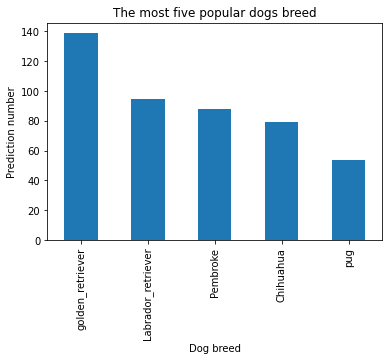

In [366]:
# Plotting the most five popular dogs' breed and ignoring the rest of them (length of breed counts is 374)

archive_clean.prediction_1.value_counts()[0:5].plot(kind = 'bar')
plt.title('The most five popular dogs breed')
plt.xlabel('Dog breed')
plt.ylabel('Prediction number');

The graph explains that the Golden Retriever is the most popular breed type and the three breeds(Lab., Pembroke, and Chihuahua)  have roughly the same rank.

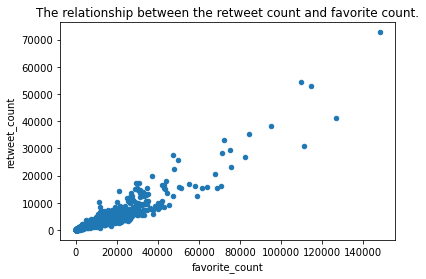

In [367]:
# Plotting the relationship between the favorite count and retweet count.

archive_clean.plot(kind ='scatter', x='favorite_count' , y='retweet_count' , title = 
                   'The relationship between the retweet count and favorite count.');

In [368]:
#Evaluate the correlation between retweet_count favorite_count
correlation = archive_clean['favorite_count'].corr(archive_clean['retweet_count'])
correlation

0.9281513351176717

The scatter graph depects a strong positive correlation between favorite and retweet counts, where the correlation coefficient = 0.9 .  That is, an increase in the number of favorite leads to an increase in the number of retweets.

In [371]:
# Sorting the dog breed by the highest rating. 

archive_clean.sort_values(by=['rating'],ascending=False)[['rating','prediction_1','p1_dog']]

,rating,prediction_1,p1_dog
979,177.6,bow_tie,False
2074,42.0,microphone,False
1120,20.4,lakeside,False
902,16.5,Labrador_retriever,True
1779,14.4,teddy,False
...,...,...,...
2261,0.1,electric_fan,False
1869,0.1,paper_towel,False
2335,0.1,Maltese_dog,True
315,0.0,swing,False


In [397]:
# Selecting the right dogs' breed via selecting the True p1_dog- Descending sort.

Rating = archive_clean.query('p1_dog == True')[['tweet_id','rating','prediction_1','p1_dog']].sort_values(by=['rating'],ascending=False)

Rating

,tweet_id,rating,prediction_1,p1_dog
902,758467244762497024,16.5,Labrador_retriever,True
1634,684225744407494656,14.3,golden_retriever,True
1635,684222868335505415,12.1,soft-coated_wheaten_terrier,True
1228,713900603437621249,9.9,golden_retriever,True
1843,675853064436391936,8.8,Labrador_retriever,True
...,...,...,...,...
765,777885040357281792,0.3,Afghan_hound,True
1189,718246886998687744,0.3,Chihuahua,True
2183,668989615043424256,0.3,pug,True
1764,678424312106393600,0.2,Maltese_dog,True


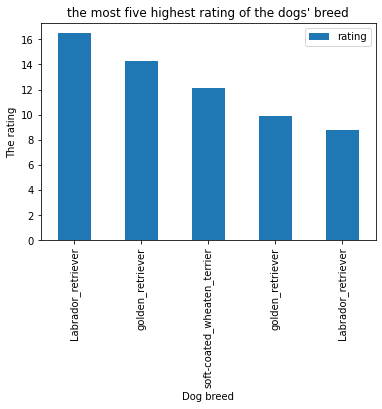

In [420]:
# Plotting the most five highest rating of the dogs' breed and ignoring the rest of them.

Rating[['prediction_1','rating']][0:5].plot(x= 'prediction_1', y= 'rating', kind = 'bar');
plt.title("the most five highest rating of the dogs' breed")
plt.xlabel('Dog breed')
plt.ylabel('The rating');

The graph display that the Labrador_retriever has the highest rating and the Gold_retriever comes next in the ranking.

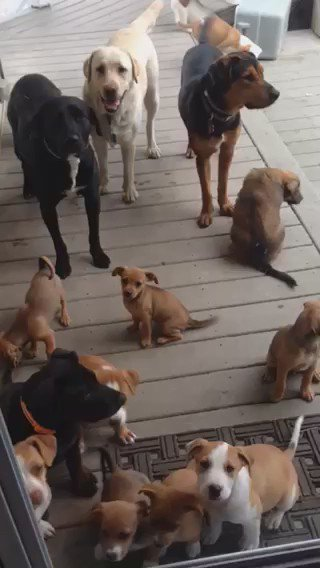

In [412]:
# Retrieving the image url related to the highest rating of the dogs' breed.
url = archive_clean[archive_clean['tweet_id']== '758467244762497024']['jpg_url'].iloc[0]
r= requests.get(url)
i = Image.open(BytesIO(r.content))
i

In [417]:
# Select the right dogs' breed via selecting the True p1_dog. Ascending sort.

archive_clean.query('p1_dog == True')[['tweet_id', 'rating','prediction_1','p1_dog']].sort_values(by=['rating'])[0:5]

,tweet_id,rating,prediction_1,p1_dog
2335,666287406224695296,0.1,Maltese_dog,True
1764,678424312106393600,0.2,Maltese_dog,True
1189,718246886998687744,0.3,Chihuahua,True
2183,668989615043424256,0.3,pug,True
765,777885040357281792,0.3,Afghan_hound,True


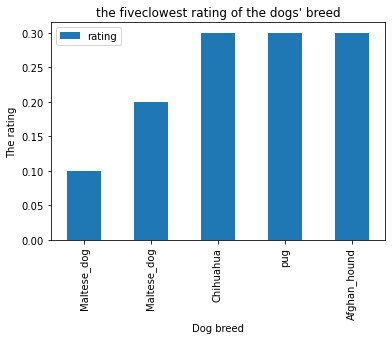

In [421]:
# Plotting  Which breed has the highest and lowest rating

archive_clean.query('p1_dog == True')[['rating','prediction_1','p1_dog']].sort_values(by=['rating'])[0:5].plot( 
    x= 'prediction_1', y= 'rating', kind = 'bar');
plt.title("the fiveclowest rating of the dogs' breed")
plt.xlabel('Dog breed')
plt.ylabel('The rating');

The graph display the Maltese_dog that has the lowest rating.

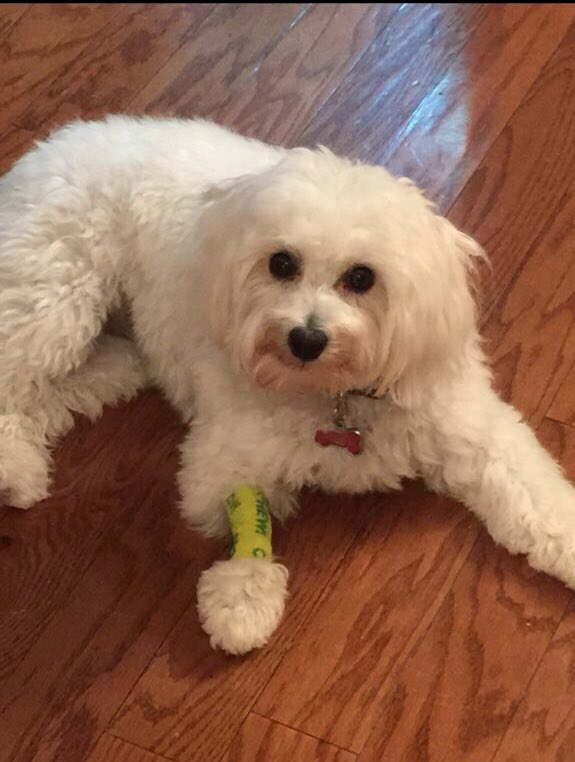

In [418]:
# Retrieving the image url related to the lowest rating of the dogs' breed.
url = archive_clean[archive_clean['tweet_id']== '666287406224695296']['jpg_url'].iloc[0]
r2= requests.get(url)
i2 = Image.open(BytesIO(r2.content))
i2